In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import data from csv files

lung_df = pd.read_csv(os.path.join('Output','Cancer_by_State_Cleaned.csv'))
county_df = pd.read_csv(os.path.join('Output','Cancer_by_County_Cleaned.csv'))
povertyDF = pd.read_csv(os.path.join('Output', 'Poverty_States_Data_Cleaned.csv'))
povertyCountyDF = pd.read_csv(os.path.join('Output', 'Poverty_County_Data_Cleaned.csv'))

## Lung Cancer Mortality Nationwide 2006-2015

# ACTION ITEM!  Need to look at this chart. I think it's misleading!

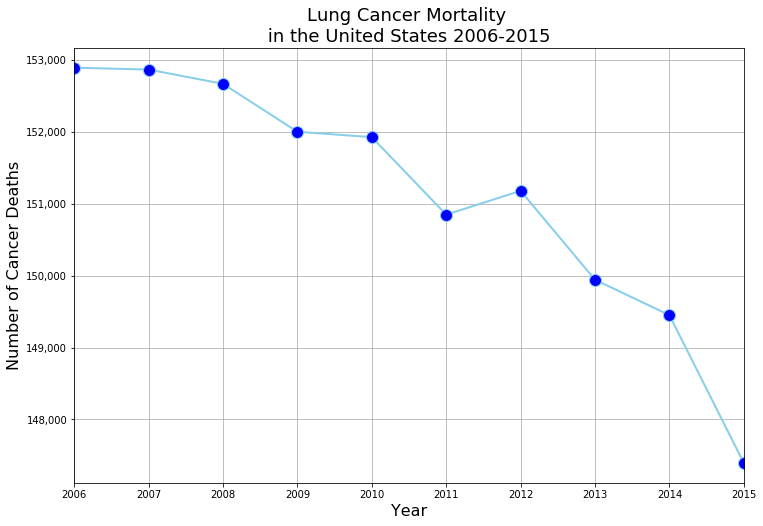

In [3]:
# Group data by year and create line graph lung cancer mortality over time from 2006-2015
Group_By_Year_df = lung_df.groupby('Year')['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=12
                                                                   ,color='skyblue'
                                                                   ,linewidth=2
                                                                   , figsize = (12,8))


Group_By_Year_df.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Lung Cancer Mortality \n in the United States 2006-2015 ',fontsize = 18)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Number of Cancer Deaths',fontsize = 16)
plt.grid(True)
plt.savefig(os.path.join("Output", "Nationwide_Cancer_Line_Chart.png"))
plt.show()

## Lung Cancer Mortality by Race 2006-2015

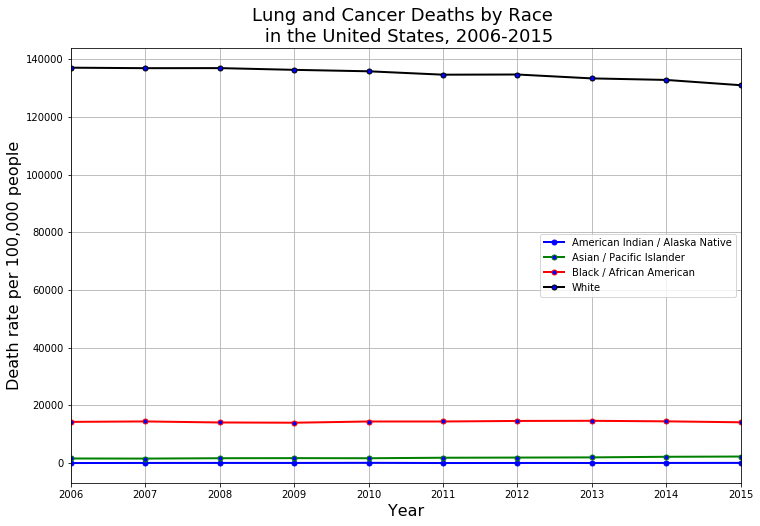

In [4]:
#Group data by Race
GroupBy_by_Race_df = lung_df.groupby('Race')

#Extract data into four seprate DataFrames based on race 
American_Indian_df = GroupBy_by_Race_df.get_group('American Indian or Alaska Native')
Asian_df = GroupBy_by_Race_df.get_group('Asian or Pacific Islander')                                              
African_American_df = GroupBy_by_Race_df.get_group('Black or African American')
White_df = GroupBy_by_Race_df.get_group('White')

# Plot total mortality by race 2006-2015
plt.figure(figsize =(12,8))
American_Indian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 

Asian_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2)

African_American_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='red'
                                                                   ,linewidth=2)

White_df.groupby(['Year'])['Deaths'].sum().plot(x='Year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='black'
                                                                   ,linewidth=2)


plt.xlabel('Year',fontsize = 16)
plt.ylabel('Death rate per 100,000 people',fontsize = 16)
plt.title('Lung and Cancer Deaths by Race \n in the United States, 2006-2015', fontsize = 18)
plt.grid(True)

plt.legend(('American Indian / Alaska Native', 'Asian / Pacific Islander', 'Black / African American','White'),
           loc='best')
plt.savefig(os.path.join("Output", "Race_Cancer_Line_Chart.png"))
plt.show()


## Lung Cancer Mortality by Sex 2006-2015

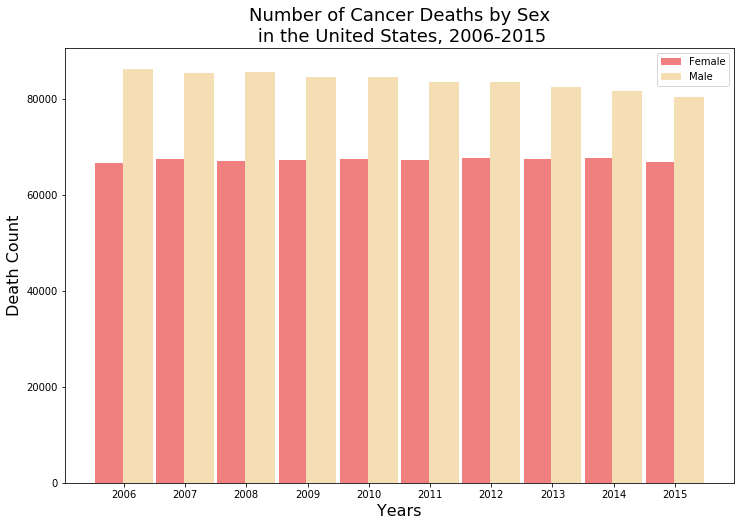

In [5]:
#Group data by sex
GroupBy_by_Sex_df = lung_df.groupby('Sex')

#Extract data into two separate dataframes based on sex
GroupBy_by_Female_df = GroupBy_by_Sex_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Sex_df.get_group('Male')  

#Group data by year for both dataframes
Group_Fe_Yr_Dth=GroupBy_by_Female_df.groupby(['Year'])['Deaths'].sum()
Group_Ma_Yr_Dth=GroupBy_by_Male_df.groupby(['Year'])['Deaths'].sum()

#New Dictionary w/ year and corresponding male/female counts
dict={'femaleCount':Group_Fe_Yr_Dth,
      'maleCount'  :Group_Ma_Yr_Dth}
Fe_Ma_df =pd.DataFrame(dict)

#Positioning
barWidth = .45
r1 = np.arange(2006,2016,1)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize =(12,8))
ax = fig.add_subplot(111)
ax.bar(r1, Group_Fe_Yr_Dth,width=0.49,color='lightcoral',align='center')
ax.bar(r2, Group_Ma_Yr_Dth,width=0.49,color='wheat',align='center')

ax.set_xlabel('Years',fontsize = 16)
ax.set_ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Sex\n in the United States, 2006-2015',fontsize = 18)
plt.legend(('Female', 'Male'),loc='upper right')
plt.xticks(r1+barWidth/2,range(2006,2016))

plt.savefig(os.path.join("Output", "Sex_Cancer_Bar_Chart.png"))
plt.show()


## Lung Cancer Mortality by Age Group 2006-2015

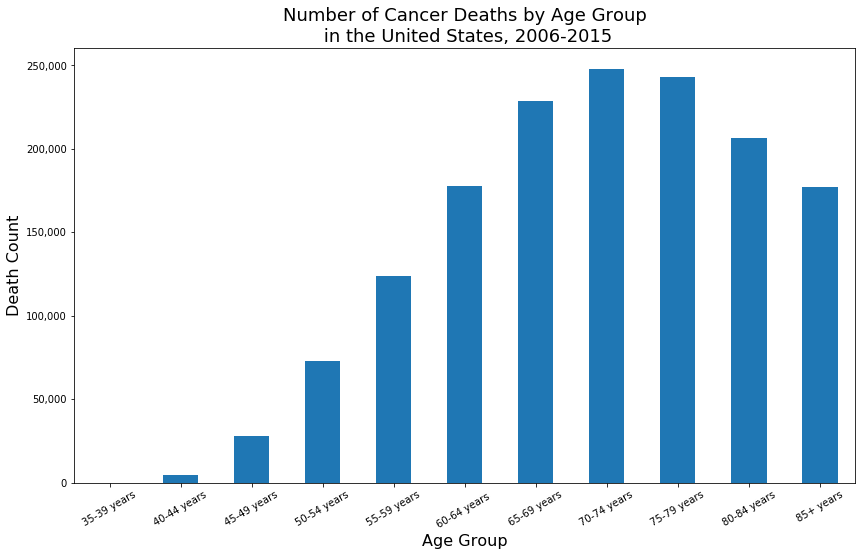

In [6]:
lung_df_02 = lung_df.copy()
# The death rate for age group below 35 is found to be ~ 0
# plot those records that have death rate > 0
lung_df_02=lung_df_02[lung_df_02['Deaths'] > 0].set_index('Age Group')

#Group data by Age and get the total number of deaths per age group
GroupBy_by_Age_df = lung_df_02.groupby('Age Group')['Deaths'].sum() 

#
plt.figure(figsize =(14,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Age Group', y='Deaths', rot=30)
plt.xlabel('Age Group',fontsize = 16)  
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Age Group\n in the United States, 2006-2015',fontsize = 18)
Death_Count_Group_By_Age.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid(False)
plt.savefig(os.path.join("Output", "Ages_Cancer_Bar_Chart.png"))
plt.show()

## Lung Cancer Mortality by Race in 2015

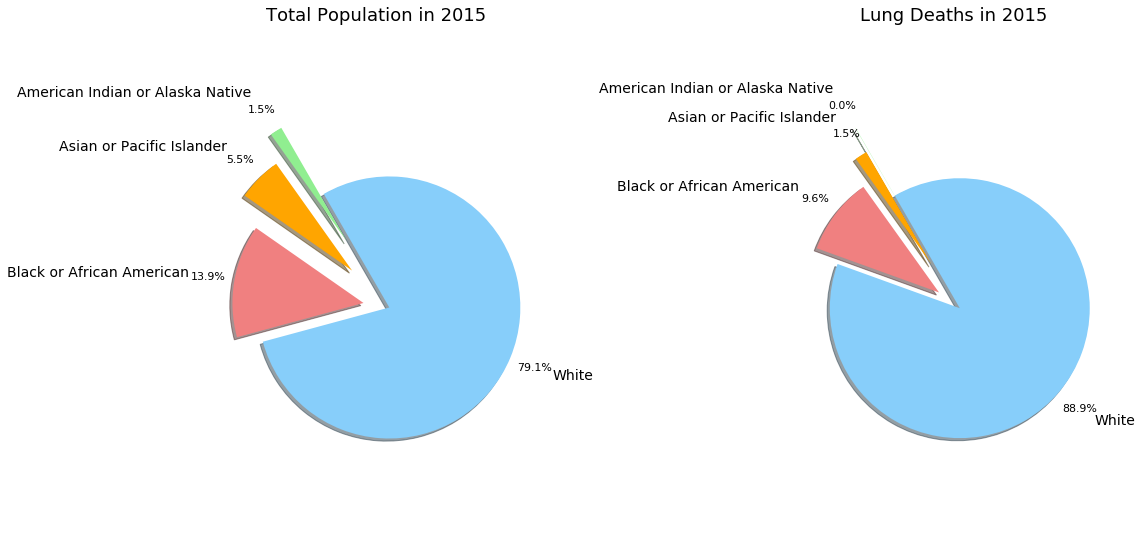

In [7]:
# Create dataframe of lung cancer deaths by year and race
lung_race_df = lung_df.groupby(["Year", "Race"])["Deaths"].sum().unstack()

# Create dataframe of population by year and race
pop_race_df = lung_df.groupby(["Year", "Race"])["Population"].sum().unstack()

#Set values for each section of the pie charts
lung_race_perc = lung_race_df.loc[2015]/lung_race_df.loc[2015].sum()
pop_race_perc = pop_race_df.loc[2015].tolist()/pop_race_df.loc[2015].sum()

# Create pie charts

explode = [0.6, 0.4, 0.2, 0]
races = list(lung_race_df)
colors = ["lightgreen", "orange", "lightcoral", "lightskyblue"]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (16, 8))
ax1.set_title("Total Population in 2015", fontsize = 18)
ax2.set_title("Lung Deaths in 2015", fontsize = 18)


patches1, texts1, autotexts1 = ax1.pie(pop_race_perc, labels = races, colors = colors, explode = explode, 
                                       autopct="%1.1f%%",shadow=True, startangle = 120, pctdistance=1.2, 
                                       labeldistance=1.35)

patches2, texts2, autotexts2 = ax2.pie(lung_race_perc, labels = races, colors = colors, explode = explode, 
                                       autopct="%1.1f%%",shadow=True, startangle = 120, pctdistance=1.2, 
                                       labeldistance=1.35)

for text in texts1:
    text.set_fontsize(14)
for autotext in autotexts1:
    autotext.set_fontsize(11)
for text in texts2:
    text.set_fontsize(14)
for autotext in autotexts2:
    autotext.set_fontsize(11)

ax1.axis("equal")
ax2.axis("equal")
plt.tight_layout()
plt.savefig(os.path.join("Output", "Race_Cancer_Pie_Chart.png"))
plt.show()

## Perform Chi-squared Goodness of Fit Test for Race

In [8]:
# Create dataframe of observed and expected values
deaths_2015 = lung_df[lung_df.Year==2015].groupby(["Year"])["Deaths"].sum()
expected_2015 = [round(x*deaths_2015[2015]) for x in pop_race_perc]
observed_2015 = lung_race_df.loc[2015]
races_df = pd.DataFrame({"Observed": observed_2015, "Expected": expected_2015})
races_df

,Observed,Expected
Race,,
American Indian or Alaska Native,50.0,2214.0
Asian or Pacific Islander,2252.0,8058.0
Black or African American,14123.0,20495.0
White,130970.0,116628.0


In [9]:
# Determine critical value for a p-value of .001 and 
critical_value = stats.chi2.ppf(q = 0.999, df = 3)
critical_value

16.26623619623813

In [10]:
# Run the chi square test with stats.chisquare()
stats.chisquare(races_df["Observed"], races_df["Expected"])

Power_divergenceResult(statistic=10043.258576797984, pvalue=0.0)

## Lung Cancer Mortality by State in 2015

In [11]:
# Create series of crude rate of mortality by lung cancer in 2015 by state

states_lung=lung_df[lung_df.Year ==2015].groupby(["State"]).agg({"Deaths":"sum"})
pop_lung=lung_df[lung_df.Year ==2015].groupby(["State"]).agg({"Population":"sum"})
states_crude = states_lung["Deaths"]*100000/pop_lung["Population"]
states_crude=states_crude.sort_values()

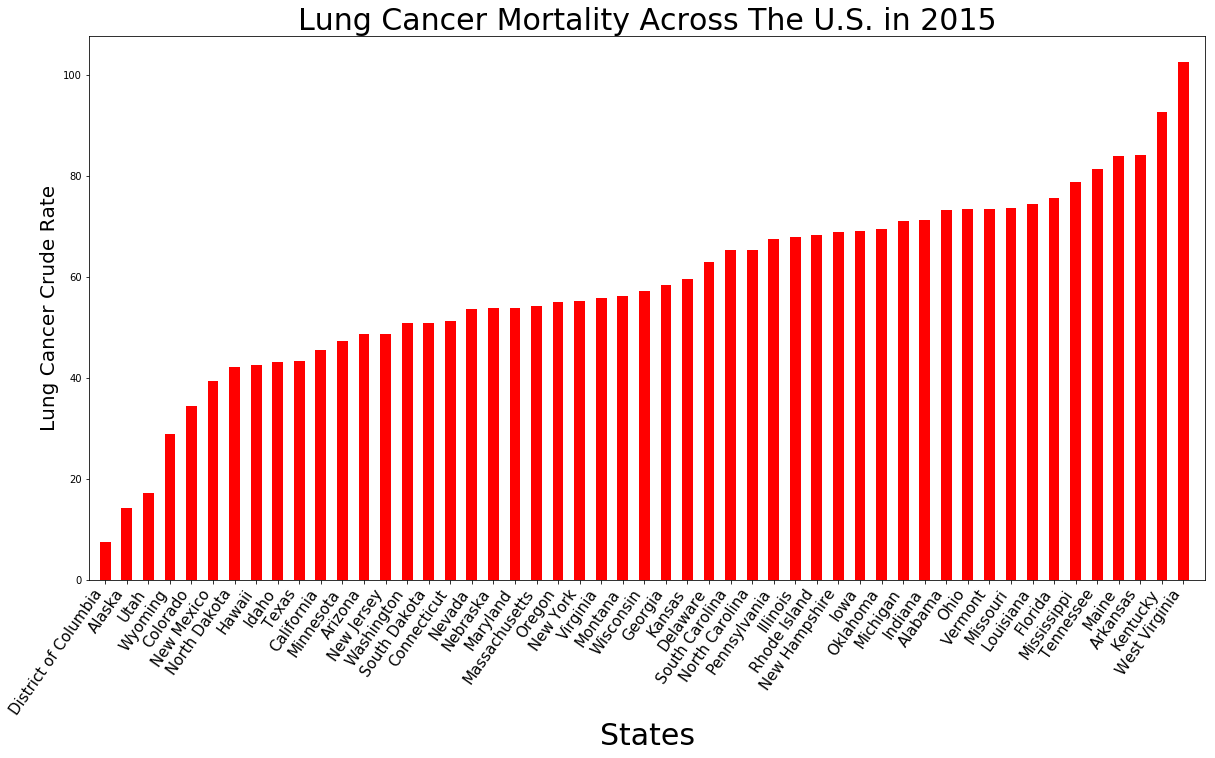

In [12]:
# Create bar chart of lung cancer mortality across the US in 2015

# Set x axis and tick locations
barlabels = states_crude.index.tolist()
x_axis = np.arange(len(barlabels))
tick_locations = [value for value in x_axis]

# Plot
states_crude.plot(kind="bar",color="red", figsize=(20,10))
  

# Set x and y limits
plt.xlim(-0.75, len(x_axis))

plt.title("Lung Cancer Mortality Across The U.S. in 2015", fontsize=30)
plt.xlabel("States", fontsize= 30)
plt.ylabel("Lung Cancer Crude Rate", fontsize=20)
plt.xticks(ha='right', rotation=55, fontsize=15)
plt.savefig(os.path.join("Output", "State_Cancer_Bar_Chart.png"))
plt.show()

## Lung Cancer Mortality vs. Poverty by State in 2015

In [13]:
# Create dataframe of lung cancer deaths by year and state
lung_state_df = lung_df.groupby(["Year", "State"])["Deaths"].sum().unstack()

# Create dataframe of population by year and state
pop_state_df = lung_df.groupby(["Year", "State"])["Population"].sum().unstack()

# Create dataframe of crude rate of cancer deaths in 2015 by state
crudeRate_df = pd.DataFrame(lung_state_df.loc[2015]*100000/pop_state_df.loc[2015])
crudeRate_df = crudeRate_df.rename(columns = {2015: '2015 Crude Mortality Rate'})
crudeRate_df = crudeRate_df.reset_index()
crudeRate_df.head()

,State,2015 Crude Mortality Rate
0,Alabama,73.103873
1,Alaska,14.208282
2,Arizona,48.576358
3,Arkansas,84.033865
4,California,45.419269


In [14]:
# Create dataframe of median poverty rate per state in 2015
pov2015df = povertyDF[['Full State Name', '2015']]
pov2015df = pov2015df.rename(columns = {'Full State Name':'State', '2015': '2015 Median Poverty Rate'})
pov2015df.head()

,State,2015 Median Poverty Rate
0,Alabama,20.2
1,Alaska,11.3
2,Arizona,19.8
3,Arkansas,21.0
4,California,16.6


In [15]:
# Merge dataframes
deathPovertyRateDF = pd.merge(pov2015df, crudeRate_df, on='State', how='inner')
deathPovertyRateDF = deathPovertyRateDF.sort_values(by='2015 Crude Mortality Rate')
deathPovertyRateDF.head()

,State,2015 Median Poverty Rate,2015 Crude Mortality Rate
8,District of Columbia,18.00,7.436001
1,Alaska,11.30,14.208282
44,Utah,13.00,17.259040
50,Wyoming,10.70,28.824251
5,Colorado,13.75,34.308564


# ACTION ITEM: MAKE CHART BIGGER AND FIND EQUATION OF LINE, Address warning?

/Users/gretelup/anaconda3/envs/PythonData/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


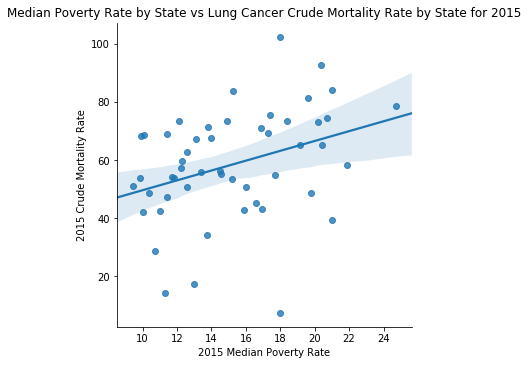

In [16]:
# Create scatter plot with regression line of median poverty rate v. crude mortality rate for 2015

sns.lmplot(x='2015 Median Poverty Rate',y='2015 Crude Mortality Rate',data=deathPovertyRateDF, fit_reg=True)
plt.title('Median Poverty Rate by State vs Lung Cancer Crude Mortality Rate by State for 2015')
plt.savefig(os.path.join("Output", "Poverty_v_Cancer_State_Scatter.png"))
plt.show()

## Lung Cancer Mortality vs. Poverty by State in 2015

In [17]:
# Create dataframe of crude rate of cancer deaths in 2015 by county

cancer_county_2015_df = county_df.loc[county_df["Year"]==2015, :]
cancer_county_2015_df = cancer_county_2015_df[["County", "Crude Rate"]]
cancer_county_2015_df = cancer_county_2015_df.rename(columns = {"Crude Rate":"2015 Crude Mortality Rate"})
cancer_county_2015_df = cancer_county_2015_df.sort_values(by = "County")
cancer_county_2015_df.head()

,County,2015 Crude Mortality Rate
3,"Acadia Parish, LA",83.1
14,"Accomack County, VA",72.8
18,"Ada County, ID",32.9
25,"Adams County, CO",26.9
32,"Adams County, IL",58.2


In [18]:
# Create dataframe of poverty rate in 2015 by county
povertyCountyDF = povertyCountyDF[["County", "2015"]]
povertyCountyDF = povertyCountyDF.rename(columns = {"2015":"2015 Poverty Rate"})
povertyCountyDF = povertyCountyDF.sort_values(by = "County")
povertyCountyDF.head()

,County,2015 Poverty Rate
0,"Abbeville County, SC",22.5
1,"Acadia Parish, LA",20.6
2,"Accomack County, VA",19.6
3,"Ada County, ID",12.3
4,"Adair County, IA",10.6


In [19]:
# Merge dataframes
deathPovertyRateCountyDF = pd.merge(povertyCountyDF, cancer_county_2015_df, how='inner')
deathPovertyRateCountyDF.head()

,County,2015 Poverty Rate,2015 Crude Mortality Rate
0,"Acadia Parish, LA",20.6,83.1
1,"Accomack County, VA",19.6,72.8
2,"Ada County, ID",12.3,32.9
3,"Adams County, CO",13.8,26.9
4,"Adams County, IL",14.4,58.2


# ACTION ITEM: MAKE CHART BIGGER AND FIND EQUATION OF LINE, Address warning?

/Users/gretelup/anaconda3/envs/PythonData/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


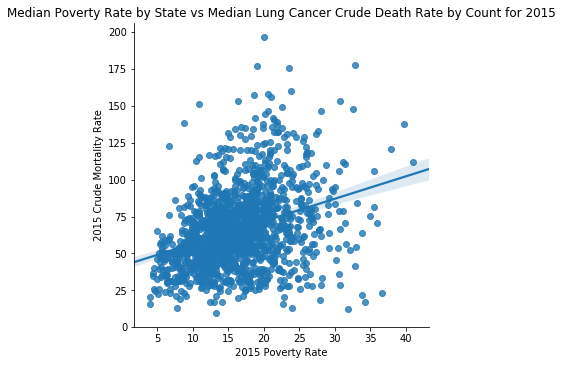

In [20]:
sns.lmplot(x='2015 Poverty Rate',y='2015 Crude Mortality Rate',data=deathPovertyRateCountyDF, fit_reg=True)
plt.savefig(os.path.join("Output", "Poverty_v_Cancer_State_Scatter.png"))
plt.title('Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by Count for 2015')
plt.savefig(os.path.join("Output", "Poverty_v_Cancer_County_Scatter.png"))
plt.show()